# Optimization method : Newton+Golden Search

1) Pass: Golden Search Method, employing the function "minimize_scalar" from scipy.optimize

2) Search direction : -$\mathbf{H}^{-1}\nabla f$ 

The first step consists in defining the algorithms parameters, such as initial point $\mathbf{x}_{(0)}$, $\alpha_{(t)}$ and convergence tolerance constant $\epsilon_{\nabla}$, as well as the function to be minimized, its gradient and Hessian evaluation:



In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
from plot_descent import plot_2d_contour, plot_3d_surface
%matplotlib widget
# Problem to be solved and variable for computational cost computation
global problem
cost=0
t=0
problem=2
# Initial guess
x=np.array([20, 20])
# Upper bound for the Gold Search algorithm
alpha0=1.0
# Convergence Tolerance
TolG=1e-5

# Definition of the equation to be minimized
def f_obj(x):
    global problem
    if problem==1:
        f = x[0]**2+x[1]**2
        df = np.array([2*x[0], 2*x[1]])
        H = np.array([[2, 0], [0, 2]])
    elif problem==2:
        f=3*x[0]**2+2*x[0]*x[1]+2*x[1]**2+7
        df=np.array([6*x[0]+2*x[1], 2*x[0]+4*x[1]])
        H = np.array([[6, 2], [2, 4]])
    return f, df,H
# Definition of the equation to be minimized as function of the step size alpha
def f_alpha(alpha,args):
    xk,d=args[0],args[1]
    xaux=xk+alpha*d
    f,df,H=f_obj(xaux)
    return f

# f and df values at the initial point
[f,df,H]=f_obj(x)

In [2]:
# Search directin: BFGS 
    

In [3]:
# Step size method: wolfe

Now, we may start the iterative process for the function minimization using the gradient descent with step size calculated using the Golden Search method. For the latter, the function "minimize_scalar" from scipy.optimize is employed



In [4]:
points = [x]
values = [f]
while np.sqrt(df @ df)>TolG:
    # Search direction as negative of the gradient
    d=-np.linalg.solve(H, df)
    #d=-df
    
    # Step determination: Golden Search (method='golden'), Brent (method='brent') or Bounded (method='bounded')
    alpha=minimize_scalar(f_alpha, bounds=(.001, alpha0), args=([x,d]), method='bounded')

    # Update the current point 
    xt=x+alpha.x*d
    points.append(xt)
    
    # Evaluate the objective function and gradient at the new point
    f,df,H=f_obj(xt)
    cost += 1
    values.append(f)
    
    # Update the design variable and iteration number 
    x=xt
    t=t+1

The optimum design is stored in the variable $x$. Once the results are obtained, we may print them:

In [5]:
print('Optimum found:')
print(xt)
print('Objective function value at the optimum:')
print(f)
print('Norm of the gradient at the optimum:')
print(np.sqrt(df @ df))
print('Number of times that the f_obj function was evaluated:')
print(cost)
print('Number of iterations for convergence:')
print(t)


Optimum found:
[3.94688294e-09 3.94688294e-09]
Objective function value at the optimum:
7.0
Norm of the gradient at the optimum:
3.9468829443465485e-08
Number of times that the f_obj function was evaluated:
2
Number of iterations for convergence:
2


(160, 160)
-20.0
-19.75
-19.5
-19.25
-19.0
-18.75
-18.5
-18.25
-18.0
-17.75
-17.5
-17.25
-17.0
-16.75
-16.5
-16.25
-16.0
-15.75
-15.5
-15.25
-15.0
-14.75
-14.5
-14.25
-14.0
-13.75
-13.5
-13.25
-13.0
-12.75
-12.5
-12.25
-12.0
-11.75
-11.5
-11.25
-11.0
-10.75
-10.5
-10.25
-10.0
-9.75
-9.5
-9.25
-9.0
-8.75
-8.5
-8.25
-8.0
-7.75
-7.5
-7.25
-7.0
-6.75
-6.5
-6.25
-6.0
-5.75
-5.5
-5.25
-5.0
-4.75
-4.5
-4.25
-4.0
-3.75
-3.5
-3.25
-3.0
-2.75
-2.5
-2.25
-2.0
-1.75
-1.5
-1.25
-1.0
-0.75
-0.5
-0.25
0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75
7.0
7.25
7.5
7.75
8.0
8.25
8.5
8.75
9.0
9.25
9.5
9.75
10.0
10.25
10.5
10.75
11.0
11.25
11.5
11.75
12.0
12.25
12.5
12.75
13.0
13.25
13.5
13.75
14.0
14.25
14.5
14.75
15.0
15.25
15.5
15.75
16.0
16.25
16.5
16.75
17.0
17.25
17.5
17.75
18.0
18.25
18.5
18.75
19.0
19.25
19.5
19.75
-20.0
-19.75
-19.5
-19.25
-19.0
-18.75
-18.5
-18.25
-18.0
-17.75
-17.5
-17.25
-17.0
-16.75
-16.5
-16.25
-16.

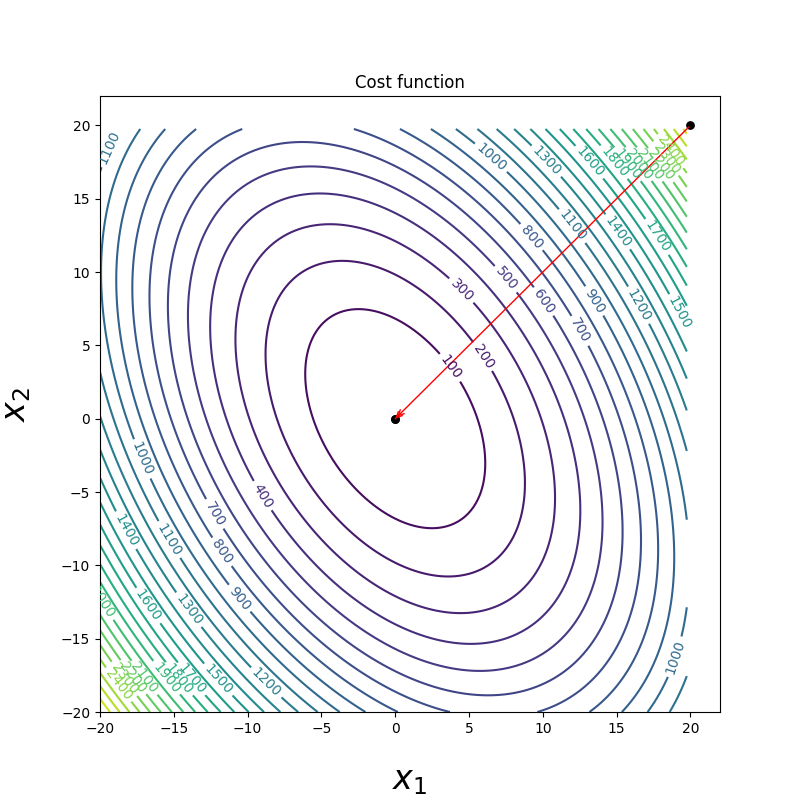

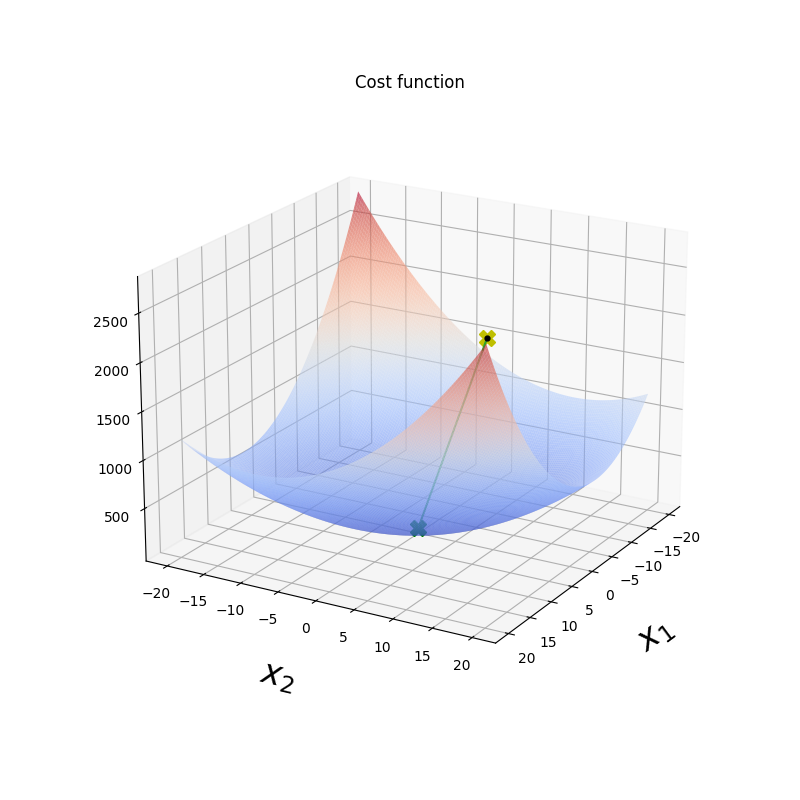

In [6]:
N = 10 # number of points to plot

plot_2d_contour(points[:N], f_obj)
plot_3d_surface(points[:N], values[:N], f_obj)